# VIII.   Binary classification 

Binary classification is the task of classifying the elements of a set into two groups on the basis of a classification rule. Typical binary classification problems include:

- Medical testing to determine if a patient has certain disease or not;

- Quality control in industry, deciding whether a specification has been met;

- In information retrieval, deciding whether a page should be in the result set of a search or not;

- Deciding whether or not a packet on a computer network is malicious or not;

- Machine learning algorithms that decide whether an input belongs to a particular category or does not belong to that category;

- When a processor receives a bit, it has to determine whether it is a 1 or a 0. 

We are making a binary decision (i.e., a sample is either class1 or class2). To make the decision the classifier will measure something about the sample (e.g., the concentration of an enzyme in a blood sample, the level of the voltage in a transistor). We have to specify a **threshold** value for the classifier, so that samples with values above the threshold are put in the class1 category and are in the class2 category otherwise. 

How do we asses the performance of the classifier? 



## Motivating example and definitions

Recall in Sec IV on Conditional Probability we considered the example of testing for a rare disease.  We define two random variables:

\begin{equation*}
  D = \left\{ \begin{array}{ll}
     1 & \text{sample is infected with the disease} \\
     0 & \text{sample is not infected with the disease} \end{array} \right.
\end{equation*}

\begin{equation*}
  T = \left\{ \begin{array}{ll}
     1 & \text{test indicates a positive result} \\
     0 & \text{test indicates a negative result} \end{array} \right.
\end{equation*}


The test is not completely accurate so there  are 4 outcomes with regard to a test and whether the sample is either infected with the disease or not infected.

\begin{eqnarray*}
    \text{False Positive (Type 1 Error)} &=&  P(T=1 | D=0) \\[3mm]
    \text{False Negative (Type II Error)} &=&  P(T=0 | D=1) \\[3mm]
    \text{True Positive} &=&  P(T=1 | D=1) \\[3mm]
    \text{True Negative} &=&  P(T=0 | D=0) 
\end{eqnarray*}

             
## Prevalence, Sensitivity, and Specificity

\begin{eqnarray*}
  \text{Prevalence} \ (\pi) &=& P(D=1) \ \ {\rm How\ common\ is\ the\ disease?} \\[3mm]
  \text{Sensitivity} \ (\eta)  &=& P(T=1|D=1) \ \ {\rm True\ positive\ rate \ (TPR)}\\[3mm]
  \text{Specificity} \ (\theta) &=& P(T=0|D=0) \ \ {\rm True\ negative\ rate\ (TNR)}
\end{eqnarray*}

Note the ***false positive rate*** (FPR) = 1 - Specifity.  We will use the FRP when plotting an ROC curve later. 

<img src="Figures/Specificity_vs_Sensitivity_Graph.png" width="500">

In this figure the x-axis is the measured value for the sample, and the different vertical lines show different choices for the classifier threshold. (Below we will explore the tradeoff between specificity and sensitivity as we change the threshold value).

The terms "sensitivity" and "specificity" were introduced by biostatistician Jacob Yerushalmy in 1947.

## Confusion matrix 

For a binary classifier we build a 2x2 matrix storing the number of ***counts*** observed in a data set for each outcome: 

<img src="Figures/confusion-matrix.png" width="300">

The entries of the matrix elements are the ***counts*** (the number of times such a sample was observed). 

\begin{eqnarray*}
{\rm TP} &=& |T=1 \cap D=1|\\[2mm]
{\rm TN} &=& |T=0 \cap D=0|\\[2mm]
{\rm FP} &=& |T=1 \cap D=0|\\[2mm]
{\rm FN} &=& |T=0 \cap D=1|
\end{eqnarray*}


From this data-driven perspective we can also write:

$$\text{Sensitivity/ Recall / TPR} \ \ \ \ \eta = \frac{TP}{TP + FN}$$

In words, this is the fraction of all positive cases that the classifier identified (the number of true positives identified divided by the total number of positive samples in the data set). 

$$\text{Specificity/ TNR} \ \ \ \ \theta = \frac{TN}{TN + FP}$$

In words, this is the fraction of all negative cases that the classifier identified (the number of true negatives identified divided by the total number of negative samples in the data set).  

In **information retrieval** there are two criteria: precision and recall.

- The sensitivity is also referred to as **recall** (how many of the actual positive cases did the classifier predict correctly).

- The **precision** tells us how many of the actual positive cases were correctly predicted by the classifier,  

$${\rm Precision} = \frac{TP}{TP + FP}$$

Note we can show how the data-driven definition is equivalent to the definition based on conditional probabiity. We show this for sensitivity here:

\begin{eqnarray*}
\eta = {\rm TPR} &=& \frac{TP}{TP + FN}\\[2mm]
&=& \frac{|T=1 \cap D=1|}{|T=1 \cap D=1| + |T=0 \cap D=1|}\\[2mm]
&=& \frac{P(T=1 \cap D=1)}{P(D=1)} \ \ \ {\rm since}\ \ P(D) = P(D=1 \cap T=1) + P(D=1 \cap T=0)\\[2mm]
&=& P(T=1 | D=1)
\end{eqnarray*}


## Tradeoff Between Sensitivity and Specificity

Sensitivity and specificity are inversely related (if you change the **threshold value** to increase one, you necessarily decrease the other).  

To understand this in depth, let's consider a detailed example using normal distributions. We input data into our classifier which computes a score for each sample (e.g., the concentration of an enzyme present in a blood sample). Based on the value of the score, the classifier will decide whether the sample is class1 or class2. 

Let $X$ correspond to the random variable denoting the computed score for a sample. Let's say $X | (D=1) \sim N(70, 15)$ and $X | (D=0) \sim N(50, 25)$. And we plot these below. 

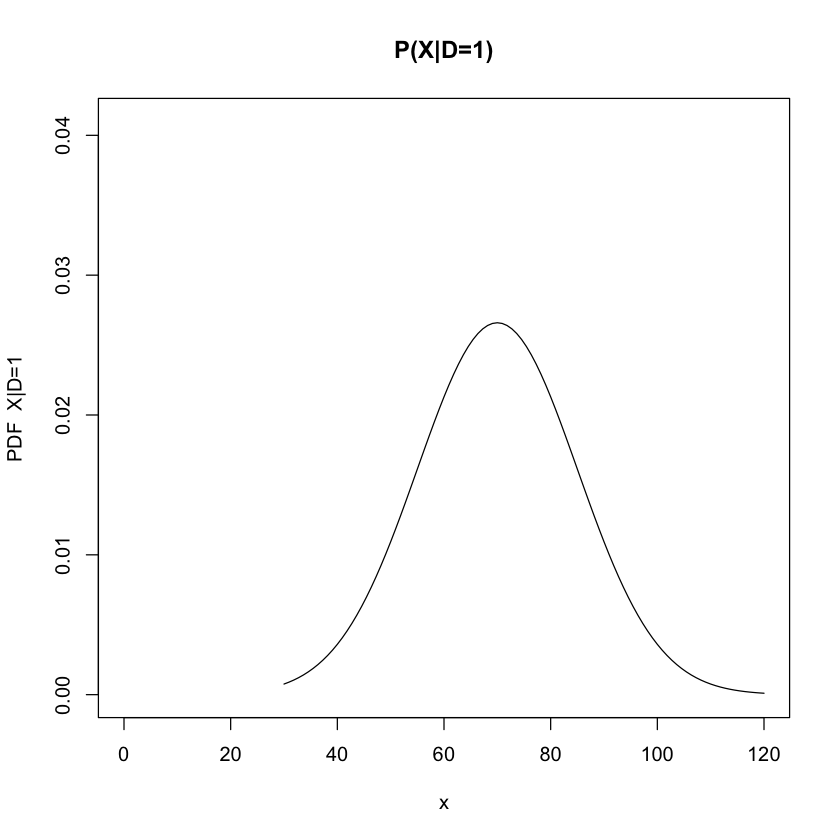

In [5]:
x = seq(30, 120, length = 100)
hx = dnorm(x, 70, 15)
plot(x, hx, xlim = c(0,120), ylim = c(0, 0.041), type='l', ylab="PDF  X|D=1", xlab="x", main="P(X|D=1)")

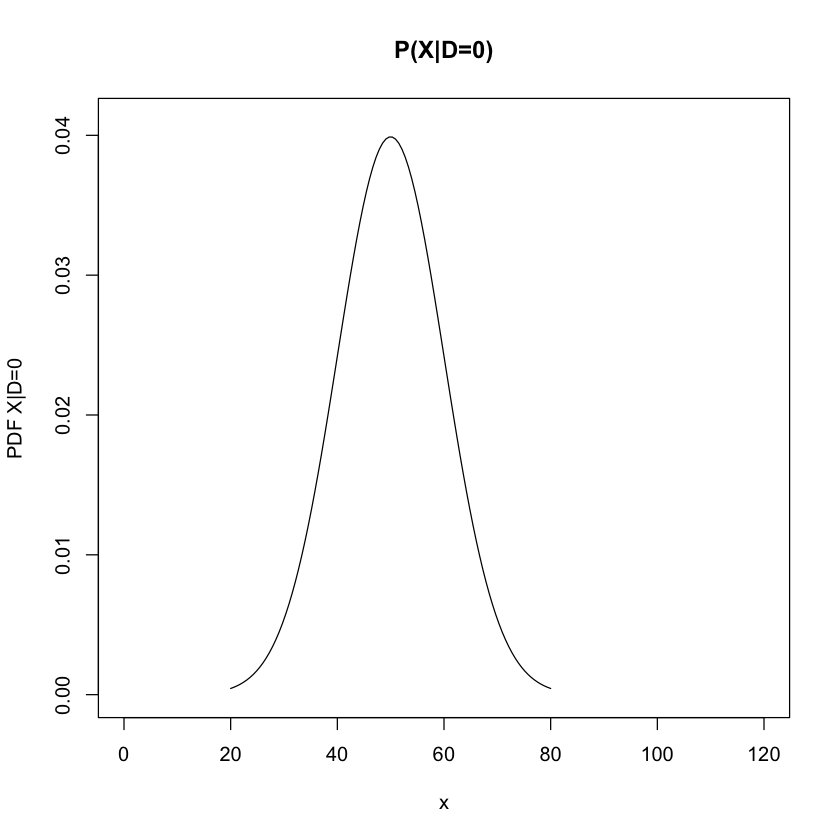

In [2]:
y = seq(20, 80, length = 100)
hy =  dnorm(y, 50, 10)
plot(y, hy, xlim = c(0,120), ylim = c(0, 0.041), type='l', ylab="PDF X|D=0", xlab="x", main="P(X|D=0)")

We need to decide the **threshold** value of $x$ denoted by $x*$ so that a sample with a value of $X>x*$ is class1 and otherwise it is in class2.  For this example let's choose $x* =30$.


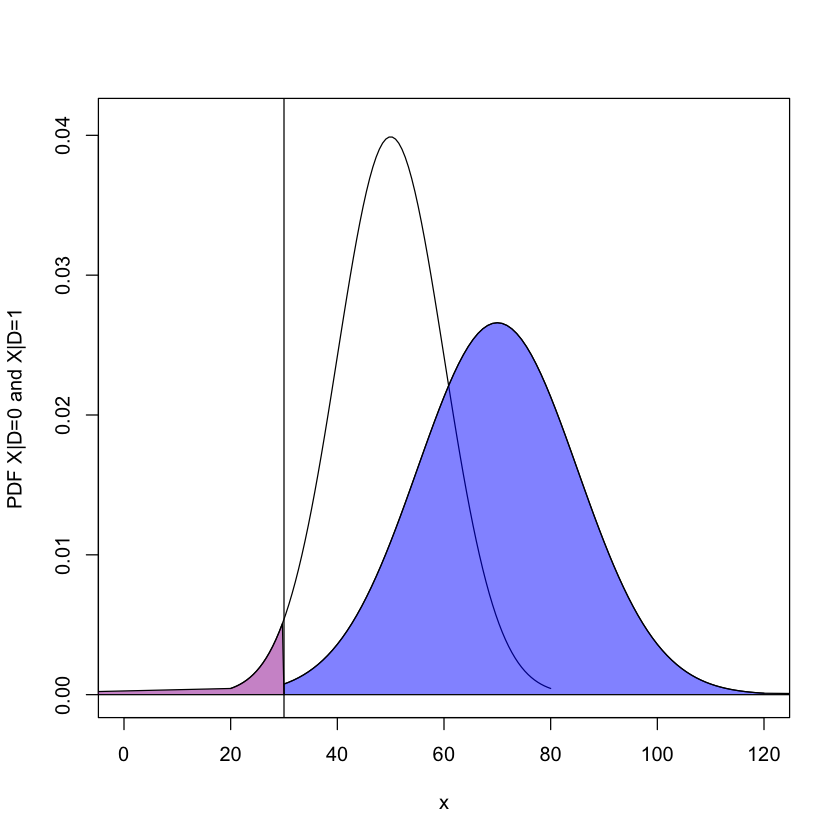

In [7]:
xstar = 30                      # set the threshold value                
x = seq(30, 120, length = 100)
hx = dnorm(x, 70, 15)           # generate the X|D=1 samples 
y = seq(20, 80, length = 100)    
hy =  dnorm(y, 50, 10)          # generate the X|D=0 samples
plot(x, hx, xlim = c(0,120), ylim = c(0, 0.041), type='l', ylab="PDF X|D=0 and X|D=1", xlab="x")
lines(y, hy)
abline(v = xstar)
ub = 150
lb = -30
i =  x >= xstar & x <= ub    # extracting all the values greater than x*
mycol1 <- rgb(0, 0, 255, max = 255, alpha = 125, names = "blue50")
polygon(c(xstar,x[i],ub), c(0,hx[i],0), col=mycol1)
j = y >= lb & y <=  xstar    # extracting all the values less than x*
mycol2 <- rgb(155, 0, 155, max = 255, alpha = 125, names = "grey50")
polygon(c(lb, y[j], xstar), c(0,hy[j],0), col=mycol2)

Sensitivity is the area under the curve $X|D=1$ for values $x > x*$ (the blue area). 

Specificity is the area under the curve $X|D=0$ for values $x < x*$ (the purple area). 

The sensitivity is high but the specificity is low. 

Now suppose we change the test criteria and choose the threshold value $x* = 75$.

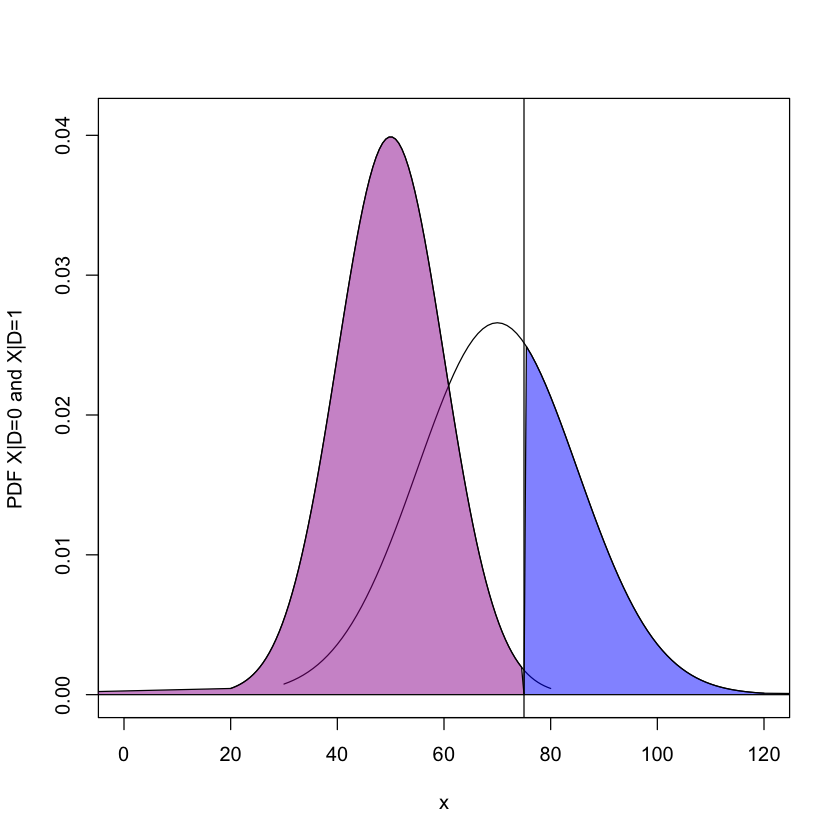

In [4]:
x = seq(30, 120, length = 100)
hx = dnorm(x, 70, 15)
y = seq(20, 80, length = 100)
hy =  dnorm(y, 50, 10)
plot(x, hx, xlim = c(0,120), ylim = c(0, 0.041), type='l', ylab="PDF X|D=0 and X|D=1", xlab="x")
lines(y, hy)
xstar = 75
abline(v = xstar)
ub = 150
lb = -30
i =  x >= xstar & x <= ub
mycol1 <- rgb(0, 0, 255, max = 255, alpha = 125, names = "blue50")
polygon(c(xstar,x[i],ub), c(0,hx[i],0), col=mycol1)
j = y >= lb & y <=  xstar 
mycol2 <- rgb(155, 0, 155, max = 255, alpha = 125, names = "grey50")
polygon(c(lb, y[j], xstar), c(0,hy[j],0), col=mycol2)

The sensitivity is the area under the curve $X|D=1$ for values $x > x*$. (The blue area.) 

The specificity is the area under the curve $X|D=0$ for values $x < x*$. (The purple area.) 

The sensitivity is low but the specificity is high. 

## How to determine the quality of the classifier? 

Recall the notation:  

- $\eta$ is sensitivity, $\eta = P(T=1|D=1)$. 

- $\theta$ is the specificity, $\theta = P(T=0|D=0)$.

- $\pi$ is the prevalence, $\pi = P(D=1)$. 

We now look at three important measures of quality. 

1. The **predictive value of a positive test**, denoted $\gamma$, is given by $\gamma = P(D=1|T=1)$.  

\begin{eqnarray*}
    \gamma &=& P(D=1|T=1) \\[2mm]
           &=& \frac{P(D=1 \cap  T=1)}{P(T=1)} \\[2mm]
           &=& \frac{P(T=1|D=1) \times P(D=1)}{P(T=1)} \\[2mm]
           &=& \frac{P(T=1|D=1) \times  P(D=1)}{P(T=1|D=1) \times P(D=1) + P(T=1|D=0) \times P(D=0) } \\[2mm]
           &=& \frac{\pi \eta}{\pi \eta + (1 - \pi)(1 - \theta)}
\end{eqnarray*}

2. The **predictive value of a negative test**, denoted $\delta$, can be similarly shown to be

\begin{eqnarray*}
    \delta &=& P(D=0|T=0) \\[2mm]
           &=& \frac{P(D=0 \cap  T=0)}{P(T=0)} \\[2mm]
           &=& \frac{P(T=0|D=0) \times P(D=0)}{P(T=0)} \\[2mm]
           &=& \frac{P(T=0|D=0) \times P(D=0)}{P(T=0|D=0) \times P(D=0) + P(T=0|D=1) \times P(D=1) } \\[2mm]
           &=& \frac{\theta \times (1 - \pi) }{\theta \times (1 - \pi) + \pi \times (1 - \eta)}
  \end{eqnarray*}


3. **ROC (Receiver Operating Characteristic)** is plot of **True Positive Rate** $\eta$  versus **False Positive Rate** $1 - \theta$. 


## Area Under the Curve (AUC) of the ROC

This is a graphical method to determine the performance of a classifier. The greater the AUC, the better the performance of the classifier. 

A great explanation is given [here in the "toward data science" blog](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5), which we will now turn to. 

### Using the ROC curve to pick the best classifier

If you have several competing classifiers, you can use the AUC of the ROC curve to select the best one.  Consider the example shown in the figure with the results from two different classifiers (with a diagonal line to show a model with no discriminatory power). Clearly the orange line performs the best (has the largest AUC). 

<img src="Figures/ROC-example.png" width="500">


## Example 1

Suppose the prevalence ($\pi$) of a disease is 0.5\%. Suppose the sensitivity ($\eta$) of the test is 0.98 and the specificity ($\theta$) is 0.96. What is the predictive value of a positive test $\gamma$, i.e., if a random person tests positive what is probability that the person has the disease. 

**Solution**

\begin{eqnarray*}
  \gamma &=& P(D=1|T=1) \\[2mm]
           &=& \frac{\pi \eta}{\pi \eta + (1 - \pi)(1 - \theta)}\\[2mm]
           &=& \frac{0.98 \times 0.005}{0.98 \times 0.005 + 0.004 \times 0.995} \\[2mm]
           &=& 0.1096
\end{eqnarray*}


## Example 2

Suppose that a detection test for a particular  malware  in code is to be applied to all the executable codes in a system. The goal is to detect the malware quickly so that it can be removed before it spreads to other code blocks. We will adopt the following convention. The test is positive ($T=1$) if malware is detected. If malware is present in the code then $D=1$.  The test has a  sensitivity of 98\% and a specificity of 96\%. Suppose that the prevalence of the malware is 0.5\%.

1. What proportion of those executable codes that test positive will actually have the malware?

2. All of the executable codes that test positive will be subjected to more expensive, time consuming diagnostic procedures to determine whether or not they actually have the malware. What percentage of the executable codes  will be subjected to these procedures?

3. The entire population of executable codes  can be viewed as having been split into four groups: true and false positive, true and false negative. What fraction of the counts of samples do we expect in each of these four categories?

**Solution**

1. We need to find $P(D=1|T=1)$.

\begin{eqnarray*}
    P(D=1|T=1) &=& \frac{P(D=1 \cap T=1)}{P(T=1)} \\[2mm]
               &=& \frac{P(T=1|D=1)P(D=1)}{P(T=1)} \\[2mm]
               &=& \frac{P(T=1|D=1)P(D=1)}{\underbrace{P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0)}_{\text{Using the law of total probability}}} \\[2mm]
               &=& \frac{0.98*0.005}{0.98*0.005 + (1-0.96)*0.995}\\[2mm]
               &=& 0.1096197
  \end{eqnarray*}


2. For this part we need to find $P(T=1)$. This is the same as the denominator:

\begin{eqnarray*}
    P(T=1) &=& P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0) \\[2mm]
           &=& 0.98*0.005 + (1-0.96)*0.995 \\[2mm]
           &=& 0.0447
\end{eqnarray*}


3. The following are the four groups, and the fraction of the total counts we expect in each group.

\begin{eqnarray*}
    \text{True Positive} &=& P(T=1 \cap D=1)\\[2mm]
                         &=& P(T=1 | D=1) P(D=1) \\[2mm]
                         &=& (0.98) \cdot (0.005)\\[2mm]
                         &=& 0.0049
\end{eqnarray*}

\begin{eqnarray*}
    \text{True Negative} &=& P(T=0 \cap D=0) \\[2mm]
                              &=& P(T=0 | D=0) P(D=0) \\[2mm]
                               &=& (0.96)\cdot (0.995)\\[2mm]
                               &=& 0.9552
\end{eqnarray*}                         

\begin{eqnarray*}    
    \text{False Negative} &=& P(T=0 \cap D=1)\\[2mm]    
                         &=& P(T=0 | D=1) P(D=1) \\[2mm]
                         &=& (1 - \eta) \cdot (0.005)\\[2mm]
                         &=& (1 - 0.98)\cdot (0.005)\\[2mm] &=&  0.0001\\
\end{eqnarray*}

\begin{eqnarray*}
    \text{False Positive} &=& P(T=1 \cap D=0)\\[2mm]
                         &=& P(T=1 | D=0) P(D=0) \\[2mm]
                         &=&  (1 - \theta) \cdot 0.995\\[2mm]
                         &=& (1 - 0.96)\cdot 0.995 = 0.0398
\end{eqnarray*}

